# Función de Rosenbrock

La función de Rosenbrock se define como:

$$F(x)=\sum_{i=1}^{n-1} b(x_{i+1}-x_{i}^2)^2 + (a-x_{i})^2 , \ con \ x={x_{i},\dots,x_{n}}$$


## Descenso por gradiente 
El método implica tomar pasos proporcionales al negativo del gradiente de la función, lo que nos lleva hacia el mínimo local. La condición inicial aleatoria nos ayuda a explorar diferentes áreas del espacio de búsqueda y evitar quedarnos atrapados en un mínimo local.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

### 2D 

La funcion de Rosenbrock sera:
$$F(x)=\sum_{i=1}^{2-1} b(x_{i+1}-x_{i}^2)^2 + (a-x_{i})^2 , \ con \ x={x_{1},x_{2}}$$
$$F(x_{1},x_{2})=(a-x_{1})^2 + b(x_{2}-x_{1}^2)^2$$


Tiene un mínimo global en (x,y)=(a,a^2), donde f(x,y)=0. Generalmente a=1 b=100,
Sólo en el caso trivial de a=0 la función es simétrica y el mínimo está en el origen. el valor mínimo de cero es en (1,1).
Para la optimización en dos dimensiones, la función se grafica como una superficie en 3D. usamos Matplotlib para visualizar.

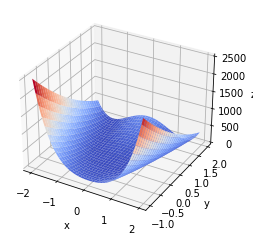

In [2]:
# Función de Rosenbrock en dos dimensiones
def rosenbrock(x, y):
    fx=((1-x)**2) + (100*(y-(x**2))**2)
    return fx

# Graficar la función de Rosenbrock en 3D
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
#creamos un vector  X de cordenadas desde -2 hasta 2 con saltos de 0.05
X = np.arange(-2, 2, 0.05)
#creamos un vector  Y de cordenadas desde -1 hasta 2 con saltos de 0.05
Y = np.arange(-1, 2, 0.05)
#lista de matrices de coordenadas a partir de vectores de coordenadas.
X, Y = np.meshgrid(X, Y)
Z = rosenbrock(X, Y)
surf = ax.plot_surface(X, Y, Z, cmap='coolwarm')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
plt.show()

In [3]:
# Gradiente de la función de Rosenbrock
def rosenbrock_gradient(x, y):
    """
    The gradient of the Rosenbrock function is a vector of the partial derivatives of the function with
    respect to each of the variables
    
    :param x: The x-coordinate of the point at which we want to evaluate the gradient
    :param y: the function to minimize
    :return: The gradient of the Rosenbrock function
    """
    #derivada de la funcion Rosenbrock respecto a X
    dx = (( -2 )* (1 - x)) + (100 * (-4) * x * (y - x**2))
    #derivada de la funcion Rosenbrock respecto a Y
    dy = 100* 2 * (y - x**2)
    return np.array([dx, dy])

In [4]:
# Método de descenso por gradiente para optimizar la función de Rosenbrock en 2D
def gradient_descent_rosenbrock(x0, y0, alpha, epsilon, max_iter):
    """
    We start at the point $(x_0, y_0)$, and then we repeatedly take a step in the direction of the
    negative gradient until we get close enough to the minimum
    
    :param x0: initial x value
    :param y0: initial y value
    :param alpha: learning rate
    :param epsilon: the threshold for the norm of the gradient
    :param max_iter: maximum number of iterations
    :return: The final value of x and the number of iterations it took to get there.
    """
    x = np.array([x0, y0])
    i = 0
    while i < max_iter:
        grad = rosenbrock_gradient(x[0], x[1])
        if np.linalg.norm(grad) < epsilon:
            break
        x -= alpha * grad
        i += 1
    return x, i

In [5]:
# Prueba de la función de optimización en 2D
x0, y0 = np.random.uniform(-2, 2), np.random.uniform(-1, 3)
alpha = 0.001
epsilon = 0.0001
max_iter = 20000
x_min, num_iter = gradient_descent_rosenbrock(x0, y0, alpha, epsilon, max_iter)
print(f"Mínimo global encontrado: ({x_min[0]:.4f}, {x_min[1]:.4f})")
print(f"Número de iteraciones: {num_iter}")

Mínimo global encontrado: (0.9999, 0.9998)
Número de iteraciones: 19713


### 3D

La funcion de Rosenbrock sera:
si n=3 
$$F(x)=\sum_{i=1}^{2} b(x_{i+1}-x_{i}^2)^2 + (a-x_{i})^2 , \ con \ x={x_{1},x_{2},x_{3}}$$
$$F(x_{1},x_{2},x_{3})=(a-x_{1})^2 + b(x_{2}-x_{1}^2)^2 + (a-x_{2})^2 + b(x_{3}-x_{2}^2)^2$$

Generalmente a=1 b=100

In [11]:
# Función de Rosenbrock en tres dimensiones
def rosenbrock_3D(x,y,z):
    fx=((1-x)**2) + (100*(y-(x**2))**2) + ((1-y)**2) + (100*(z-(y**2))**2)
    return fx

In [12]:
# Gradiente de la función de Rosenbrock
def rosenbrock_gradient_3D(x, y,z):
    """
    The gradient of the Rosenbrock function is a vector of the partial derivatives of the Rosenbrock
    function with respect to x, y, and z
    
    :param x: the x-coordinate of the point we're evaluating the gradient at
    :param y: the current value of the parameter
    :param z: the initial point
    :return: The gradient of the Rosenbrock function
    """
    #derivada de la funcion Rosenbrock respecto a X
    dx = (( -2 )* (1 - x)) + (100 * (-4) * x * (y - x**2))
    #derivada de la funcion Rosenbrock respecto a Y
    dy = 200* (y - x**2) - 400*y*(z-y**2)-2*(1-y)
    #derivada de la funcion Rosenbrock respecto a Z
    dz= 200*(z-y**2)
    return np.array([dx, dy, dz])

In [13]:
# Método de descenso por gradiente para optimizar la función de Rosenbrock en 3D
def gradient_descent_rosenbrock_3D(x0, y0,z0, alpha, epsilon, max_iter):
    """
    It takes in the initial guess, the learning rate, the tolerance, and the maximum number of
    iterations, and returns the final guess and the number of iterations it took to converge
    
    :param x0: Initial value of x
    :param y0: initial y value
    :param z0: initial value for z
    :param alpha: learning rate
    :param epsilon: the tolerance for the norm of the gradient. If the norm of the gradient is less than
    epsilon, we stop
    :param max_iter: maximum number of iterations
    :return: the value of x,y,z and the number of iterations.
    """
    x = np.array([x0, y0, z0])
    i = 0
    while i < max_iter:
        grad = rosenbrock_gradient_3D(x[0], x[1],x[2])
        if np.linalg.norm(grad) < epsilon:
            break
        x -= alpha * grad
        i += 1
    return x, i

In [14]:
# Prueba de la función de optimización en 3D
x0, y0 , z0= np.random.uniform(-2, 2), np.random.uniform(-1, 3), np.random.uniform(-2,2)
alpha = 0.001
epsilon = 0.001
max_iter = 20000
x_min_3D, num_iter_3D = gradient_descent_rosenbrock_3D(x0, y0,z0, alpha, epsilon, max_iter)
print(f"Mínimo global encontrado: ({x_min_3D[0]:.4f}, {x_min_3D[1]:.4f}, {x_min_3D[2]:.4f})")
print(f"Número de iteraciones: {num_iter_3D}")

Mínimo global encontrado: (0.9995, 0.9991, 0.9982)
Número de iteraciones: 12417


In [18]:
round(rosenbrock_3D(x_min[0],x_min[1],x_min[2]),2)

0.0